# Decision Tree Model

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Set working directory
month_file = '3_July'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [2]:
# Filter Columns
filter = ['gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']

# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])


classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[139 157]
 [134 352]]
Accuracy:  0.6278772378516624
Precision:  0.6003547860129392
Recall:  0.5969372149927705
F1 Score:  0.5980570691771687


### Which IDVs have the most weight in the model

In [3]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'first_outcome', 3: 'first_wager', 4: 'first_p/b', 5: 'last_outcome', 6: 'last_wager', 7: 'last_p/b', 8: 'beginning_amt', 9: 'ending_amt', 10: 'ending_balance', 11: 'ave_slotdenom', 12: 'std_slotdenom', 13: 'min_slotdenom', 14: 'max_slotdenom', 15: 'ave_theo_payback', 16: 'min_theo_payback', 17: 'max_theo_payback', 18: 'ave_wageramt', 19: 'std_wageramt', 20: 'min_wager', 21: 'max_wager', 22: 'ave_p/b', 23: 'std_p/b', 24: 'max_p/b', 25: 'max_profit', 26: 'depletion_slope', 27: '#inc_slotdenom', 28: '#dec_slotdenom', 29: '#inc_maxbet', 30: '#dec_maxbet', 31: '#W', 32: '#L', 33: '#NH', 34: '#D', 35: '#2ws', 36: '#3ws', 37: '#4ws', 38: 'w/min', 39: 'l/min', 40: '2ws/min', 41: '3ws/min', 42: '4ws/min', 43: 'nh/min', 44: 'd/min', 45: 'w/g', 46: 'l/g', 47: 'nh/g', 48: 'd/g', 49: 'ave_time_per_gamble', 50: 'min_time_per_gamble', 51: 'max_time_per_gamble', 52: 'machines_changes', 53: 'unique_machines', 54: 'ave_time_per_machine', 55: 'total_duration', 56: 'total_g

In [4]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x38: 0.25025608194622284
remainder__x47: 0.14327784891165174
remainder__x49: 0.10864276568501921
remainder__x51: 0.10422535211267606
remainder__x39: 0.09635083226632524
remainder__x19: 0.06610115236875799
remainder__x15: 0.06558898847631243
remainder__x25: 0.062227912932138287
remainder__x26: 0.06065941101152368
remainder__x54: 0.060595390524967985
remainder__x56: 0.05502560819462229
remainder__x10: 0.05284891165172856
remainder__x21: 0.04619078104993597
remainder__x46: 0.03889244558258642
remainder__x20: 0.03866837387964149
remainder__x23: 0.038412291933418705
remainder__x40: 0.035019206145966694
remainder__x48: 0.034539052496798964
remainder__x22: 0.03444302176696543
remainder__x45: 0.032362355953905256
remainder__x8: 0.028233034571062743
remainder__x43: 0.02628040973111393
remainder__x3: 0.025608194622279125
remainder__x24: 0.023303457106273996
remainder__x41: 0.022695262483994873
remainder__x28: 0.022599231754161342
remainder__x6: 0.018213828425096022
remainder__x16: 0.0

## Cumulative Accuracy Profile (CAP) Graph

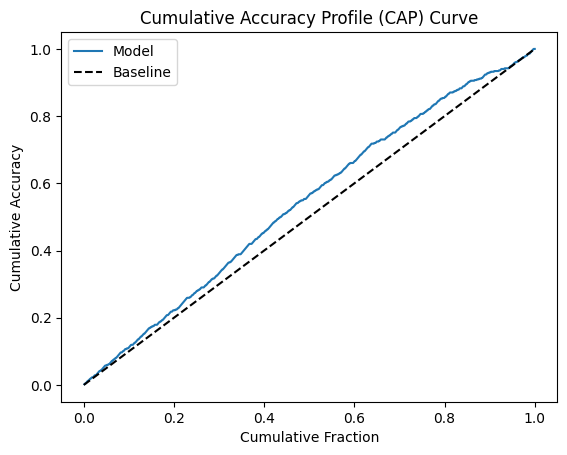

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [6]:
# Filter Columns
filter = ['gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']

# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])


classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[1845  597]
 [ 492  337]]
Accuracy:  0.6670742892081932
Precision:  0.5751436943536572
Recall:  0.5810210638316791
F1 Score:  0.5772154765300116


In [7]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'first_outcome', 3: 'first_wager', 4: 'first_p/b', 5: 'last_outcome', 6: 'last_wager', 7: 'last_p/b', 8: 'beginning_amt', 9: 'ending_amt', 10: 'ending_balance', 11: 'ave_slotdenom', 12: 'std_slotdenom', 13: 'min_slotdenom', 14: 'max_slotdenom', 15: 'ave_theo_payback', 16: 'min_theo_payback', 17: 'max_theo_payback', 18: 'ave_wageramt', 19: 'std_wageramt', 20: 'min_wager', 21: 'max_wager', 22: 'ave_p/b', 23: 'std_p/b', 24: 'max_p/b', 25: 'max_profit', 26: 'depletion_slope', 27: '#inc_slotdenom', 28: '#dec_slotdenom', 29: '#inc_maxbet', 30: '#dec_maxbet', 31: '#W', 32: '#L', 33: '#NH', 34: '#D', 35: '#2ws', 36: '#3ws', 37: '#4ws', 38: 'w/min', 39: 'l/min', 40: '2ws/min', 41: '3ws/min', 42: '4ws/min', 43: 'nh/min', 44: 'd/min', 45: 'w/g', 46: 'l/g', 47: 'nh/g', 48: 'd/g', 49: 'ave_time_per_gamble', 50: 'min_time_per_gamble', 51: 'max_time_per_gamble', 52: 'machines_changes', 53: 'unique_machines', 54: 'ave_time_per_machine', 55: 'total_duration', 56: 'total_g

In [8]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x39: 0.1813622811711643
remainder__x9: 0.11681064138827309
remainder__x16: 0.09993884259613181
remainder__x8: 0.09165201437198991
remainder__x32: 0.08932038834951456
remainder__x51: 0.08265423132788016
remainder__x49: 0.06702851463955353
remainder__x25: 0.0646968886170782
remainder__x18: 0.06179191193333845
remainder__x54: 0.05679993884259613
remainder__x52: 0.05135692989832584
remainder__x24: 0.04931580154422446
remainder__x56: 0.04864307010167419
remainder__x55: 0.045378793670208674
remainder__x15: 0.043268863236755585
remainder__x45: 0.04170934943811637
remainder__x26: 0.04151058787554468
remainder__x46: 0.04144943047167647
remainder__x19: 0.038605611191804924
remainder__x22: 0.03609051295772493
remainder__x30: 0.035012613714547815
remainder__x40: 0.03434752694748109
remainder__x3: 0.032833881201742986
remainder__x34: 0.032444002752083166
remainder__x6: 0.03219937313661033
remainder__x48: 0.030899778304410985
remainder__x23: 0.028575796957419165
remainder__x47: 0.02775781

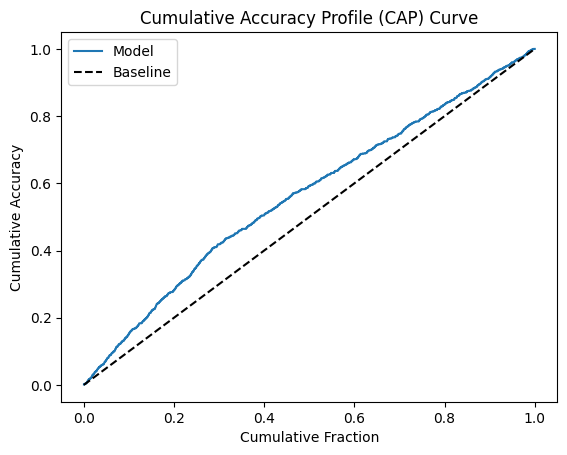

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()